In [10]:
import numpy as np
import matplotlib.pyplot as pt
%matplotlib inline

In [11]:
from PIL import Image

with Image.open("quad.jpg") as img:
    rgb_img = np.array(img)
rgb_img.shape

(500, 1417, 3)

In [12]:
img = np.sum(rgb_img, axis=-1)
#img = rgb_img
img.shape

(500, 1417)

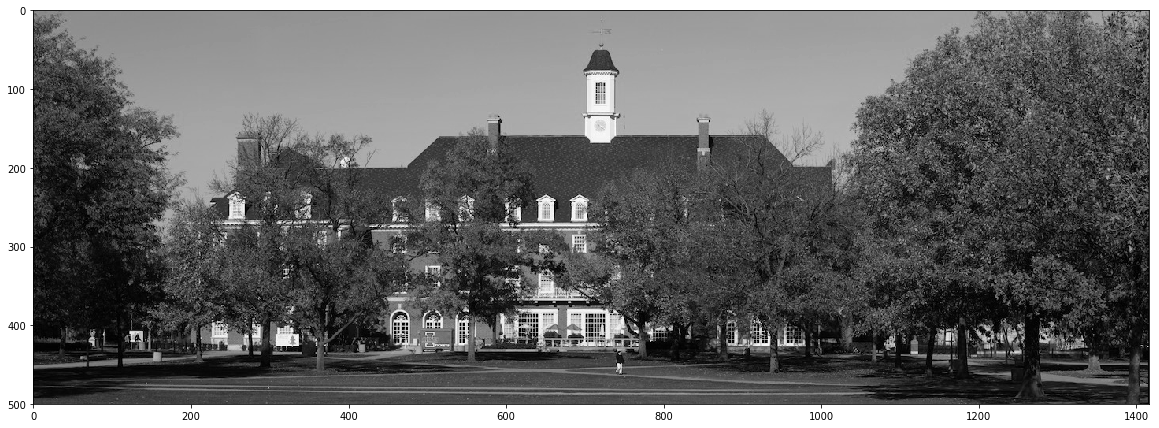

In [15]:
pt.figure(figsize=(20,10))
pt.imshow(img, cmap="gray")

(500, 500)
(500,)
(1417, 1417)


Text(0,0.5,'singular values')

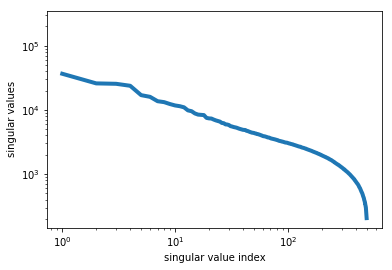

In [14]:
u, sigma, vt = np.linalg.svd(img)
print(u.shape)
print(sigma.shape)
print(vt.shape)

pt.loglog(sigma, lw=4)
pt.xlabel('singular value index')
pt.ylabel('singular values')

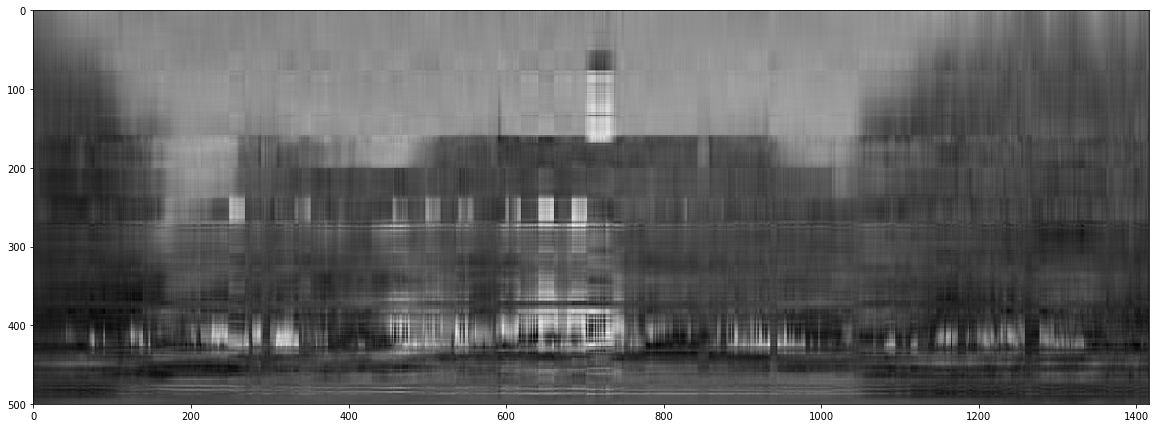

In [20]:
k=10
compressed_img = u[:,:k] @ np.diag(sigma[:k]) @ vt[:k,:]
pt.figure(figsize=(20,10))
pt.imshow(compressed_img, cmap="gray")

In [32]:
original_size = img.size
compressed_size = u[:,:n].size + sigma[:n].size + vt[:n,:].size
print("original size: %d" % original_size)
print("compressed size: %d" % compressed_size)
print("ratio: %f" % (compressed_size / original_size))

original size: 708500
compressed size: 383600
ratio: 0.541426
